In [1]:
#importing files
import os
import pandas as pd
import shutil
import torch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms, datasets
from torchsummary import summary

import seaborn as sns

## Merging files for trainnig dataset

In [2]:


# Base path containing the folders with disease-specific images and metadata
base_path = r"C:\Users\Hassan\Ilab\Skin Disease Dataset\train"

# List of subfolders (diseases) to be merged
disease_folders = [
    "actinic keratosis train",
    "basal cell carcinoma train",
    "melanoma train",
    "squamous cell carcinoma train"
]

# Initialize an empty DataFrame for the merged metadata
merged_metadata = pd.DataFrame()

# Output folder to copy all images into one place
output_images_path = os.path.join(base_path, "four_dieaseses")
os.makedirs(output_images_path, exist_ok=True)

# Loop through each folder, merge metadata, and copy images
for folder in disease_folders:
    folder_path = os.path.join(base_path, folder)
    
    # Read the metadata CSV file from the folder
    metadata_file = os.path.join(folder_path, "train_metadata.csv")
    if os.path.exists(metadata_file):
        metadata_df = pd.read_csv(metadata_file)
        
        # Merge the metadata into the overall DataFrame
        merged_metadata = pd.concat([merged_metadata, metadata_df], ignore_index=True)
        
        # Copy images to the output folder
        for isic_id in metadata_df['isic_id']:
            image_file = os.path.join(folder_path, f"{isic_id}.jpg")
            if os.path.exists(image_file):
                shutil.copy(image_file, output_images_path)

# Save the merged metadata inside the "all_images" folder
merged_metadata_output = os.path.join(output_images_path, "merged_train_metadata.csv")
merged_metadata.to_csv(merged_metadata_output, index=False)

print(f"Merged metadata saved to: {merged_metadata_output}")
print(f"All images copied to: {output_images_path}")

Merged metadata saved to: C:\Users\Hassan\Ilab\Skin Disease Dataset\train\four_dieaseses\merged_train_metadata.csv
All images copied to: C:\Users\Hassan\Ilab\Skin Disease Dataset\train\four_dieaseses


## merging files for test dataset

In [3]:
# Base path containing the folders with disease-specific images and metadata for the test set
base_path = r"C:\Users\Hassan\Ilab\Skin Disease Dataset\test"

# List of subfolders (diseases) to be merged for the test set
disease_folders = [
    "actinic keratosis test",
    "basal cell carcinoma test",
    "melanoma test",
    "squamous cell carcinoma test"
]

# Initialize an empty DataFrame for the merged metadata
merged_metadata = pd.DataFrame()

# Output folder to copy all images into one place for the test set
output_images_path = os.path.join(base_path, "four_dieaseses")
os.makedirs(output_images_path, exist_ok=True)

# Loop through each folder, merge metadata, and copy images
for folder in disease_folders:
    folder_path = os.path.join(base_path, folder)
    
    # Read the metadata CSV file from the folder
    metadata_file = os.path.join(folder_path, "test_metadata.csv")  # Assuming test metadata file follows similar naming
    if os.path.exists(metadata_file):
        metadata_df = pd.read_csv(metadata_file)
        
        # Merge the metadata into the overall DataFrame
        merged_metadata = pd.concat([merged_metadata, metadata_df], ignore_index=True)
        
        # Copy images to the output folder
        for isic_id in metadata_df['isic_id']:
            image_file = os.path.join(folder_path, f"{isic_id}.jpg")
            if os.path.exists(image_file):
                shutil.copy(image_file, output_images_path)

# Save the merged metadata inside the "all_images" folder for the test set
merged_metadata_output = os.path.join(output_images_path, "merged_test_metadata.csv")
merged_metadata.to_csv(merged_metadata_output, index=False)

print(f"Merged metadata saved to: {merged_metadata_output}")
print(f"All test images copied to: {output_images_path}")

Merged metadata saved to: C:\Users\Hassan\Ilab\Skin Disease Dataset\test\four_dieaseses\merged_test_metadata.csv
All test images copied to: C:\Users\Hassan\Ilab\Skin Disease Dataset\test\four_dieaseses


In [4]:

# Path to the merged metadata
metadata_path = r"C:\Users\Hassan\Ilab\Skin Disease Dataset\train\four_dieaseses\merged_train_metadata.csv"

# Load the metadata
metadata = pd.read_csv(metadata_path)


In [5]:
# 1. Basic Overview
print("\n--- Basic Overview ---")
print(f"Number of rows: {metadata.shape[0]}")
print(f"Number of columns: {metadata.shape[1]}")
print("\nColumn Names:")
print(metadata.columns.tolist())
print(metadata.info())


--- Basic Overview ---
Number of rows: 3600
Number of columns: 25

Column Names:
['isic_id', 'attribution', 'copyright_license', 'acquisition_day', 'age_approx', 'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm', 'concomitant_biopsy', 'dermoscopic_type', 'diagnosis', 'diagnosis_confirm_type', 'family_hx_mm', 'fitzpatrick_skin_type', 'image_type', 'lesion_id', 'melanocytic', 'patient_id', 'personal_hx_mm', 'sex', 'mel_class', 'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 3600 non-null   object 
 1   attribution             3600 non-null   object 
 2   copyright_license       3600 non-null   object 
 3   acquisition_day         70 non-null     float64
 4   age_approx              3600 non-null   int64  
 5   anatom_

In [6]:
# 2. Check for Missing Values
print("\n--- Missing Values ---")
missing_values = metadata.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


--- Missing Values ---
acquisition_day           3530
benign_malignant          1597
clin_size_long_diam_mm    3437
concomitant_biopsy           1
dermoscopic_type          2444
family_hx_mm              2871
fitzpatrick_skin_type     3385
lesion_id                  755
melanocytic                181
patient_id                2624
personal_hx_mm            2835
sex                          3
mel_class                 3486
mel_mitotic_index         3595
mel_thick_mm              3516
mel_type                  3577
mel_ulcer                 3571
dtype: int64


In [7]:
# 1. Basic Overview
print("\n--- Basic Overview ---")
print(f"Number of rows: {metadata.shape[0]}")
print(f"Number of columns: {metadata.shape[1]}")
print("\nColumn Names:")
print(metadata.columns.tolist())
print(metadata.info())



--- Basic Overview ---
Number of rows: 3600
Number of columns: 25

Column Names:
['isic_id', 'attribution', 'copyright_license', 'acquisition_day', 'age_approx', 'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm', 'concomitant_biopsy', 'dermoscopic_type', 'diagnosis', 'diagnosis_confirm_type', 'family_hx_mm', 'fitzpatrick_skin_type', 'image_type', 'lesion_id', 'melanocytic', 'patient_id', 'personal_hx_mm', 'sex', 'mel_class', 'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 3600 non-null   object 
 1   attribution             3600 non-null   object 
 2   copyright_license       3600 non-null   object 
 3   acquisition_day         70 non-null     float64
 4   age_approx              3600 non-null   int64  
 5   anatom_

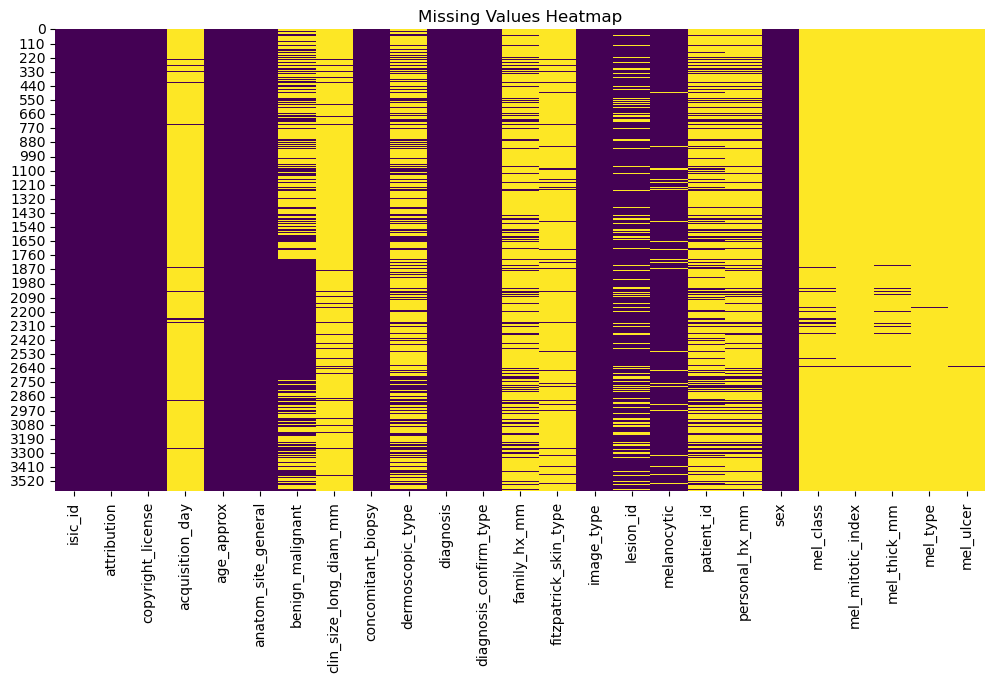

In [8]:
# 3. Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(metadata.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:

# 4. Descriptive Statistics for Numerical Columns
print("\n--- Descriptive Statistics for Numerical Columns ---")
numeric_cols = metadata.select_dtypes(include=['float64', 'int64']).columns
print(metadata[numeric_cols].describe())


--- Descriptive Statistics for Numerical Columns ---
       acquisition_day   age_approx  clin_size_long_diam_mm  mel_thick_mm
count        70.000000  3600.000000              163.000000     84.000000
mean        296.000000    66.184722                8.251534      0.478452
std         656.567755    14.097586                4.381955      0.884944
min           1.000000    15.000000                1.700000      0.000000
25%           1.000000    55.000000                5.300000      0.000000
50%           1.000000    70.000000                7.000000      0.185000
75%         209.500000    80.000000               10.000000      0.477500
max        3119.000000    85.000000               30.000000      4.300000


In [10]:
# 5. Categorical Columns Overview
print("\n--- Categorical Columns Overview ---")
categorical_cols = metadata.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(metadata[col].value_counts())
    print("-" * 40)


--- Categorical Columns Overview ---

Value Counts for isic_id:
isic_id
ISIC_0027829    1
ISIC_0061300    1
ISIC_0030970    1
ISIC_0054062    1
ISIC_0034572    1
               ..
ISIC_0031489    1
ISIC_0057384    1
ISIC_0023800    1
ISIC_0012753    1
ISIC_0021672    1
Name: count, Length: 3600, dtype: int64
----------------------------------------

Value Counts for attribution:
attribution
Hospital Clínic de Barcelona                                                                                    1585
Anonymous                                                                                                       1082
ViDIR Group, Department of Dermatology, Medical University of Vienna                                             574
Hospital Italiano de Buenos Aires                                                                                178
Memorial Sloan Kettering Cancer Center                                                                           130
Department of Dermat

C:\Users\Hassan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


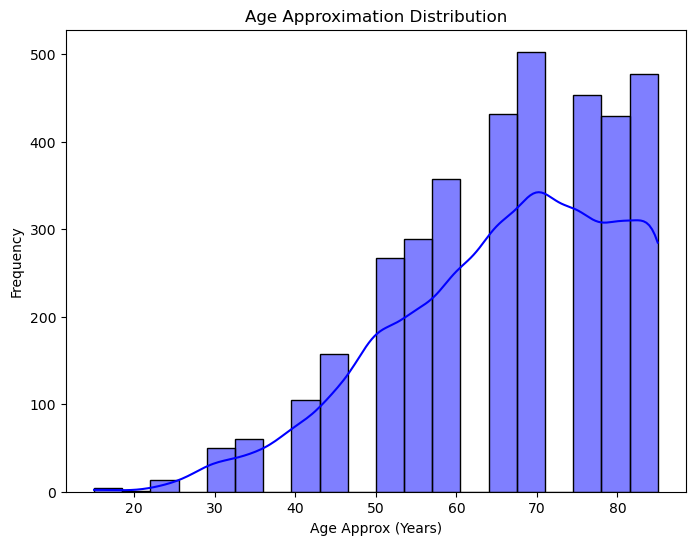

In [11]:
# 6. Distribution of Key Features

# Age Approximation Distribution
plt.figure(figsize=(8, 6))
sns.histplot(metadata['age_approx'], bins=20, kde=True, color='blue')
plt.title('Age Approximation Distribution')
plt.xlabel('Age Approx (Years)')
plt.ylabel('Frequency')
plt.show()

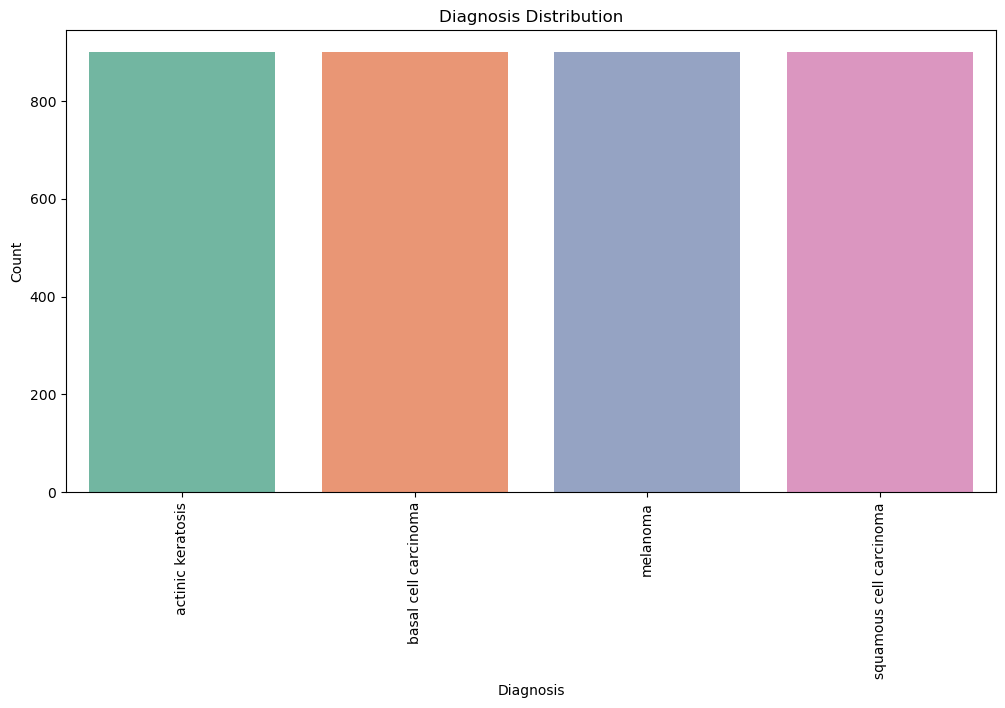

In [12]:

# Diagnosis Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='diagnosis', order=metadata['diagnosis'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

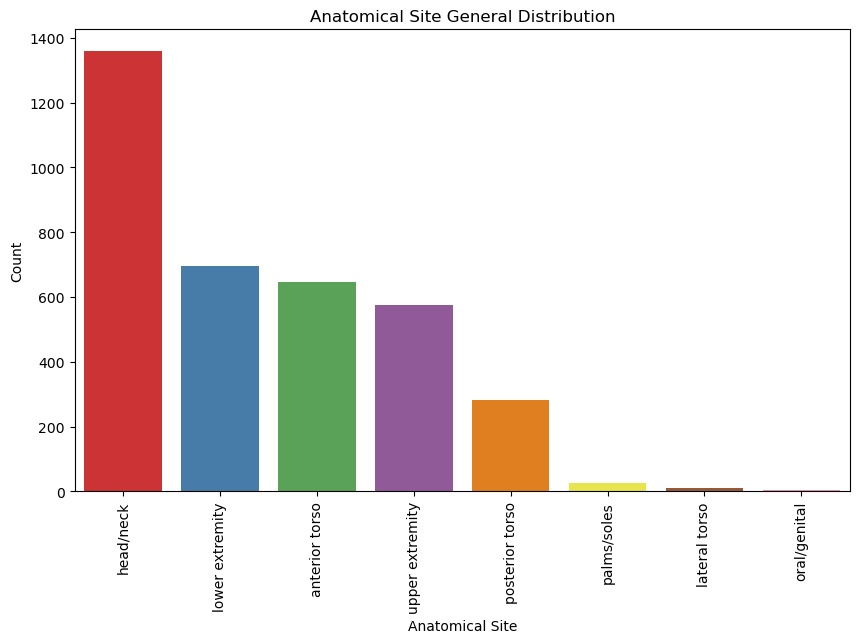

In [13]:
# Anatomical Site Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='anatom_site_general', order=metadata['anatom_site_general'].value_counts().index, palette='Set1')
plt.xticks(rotation=90)
plt.title('Anatomical Site General Distribution')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.show()

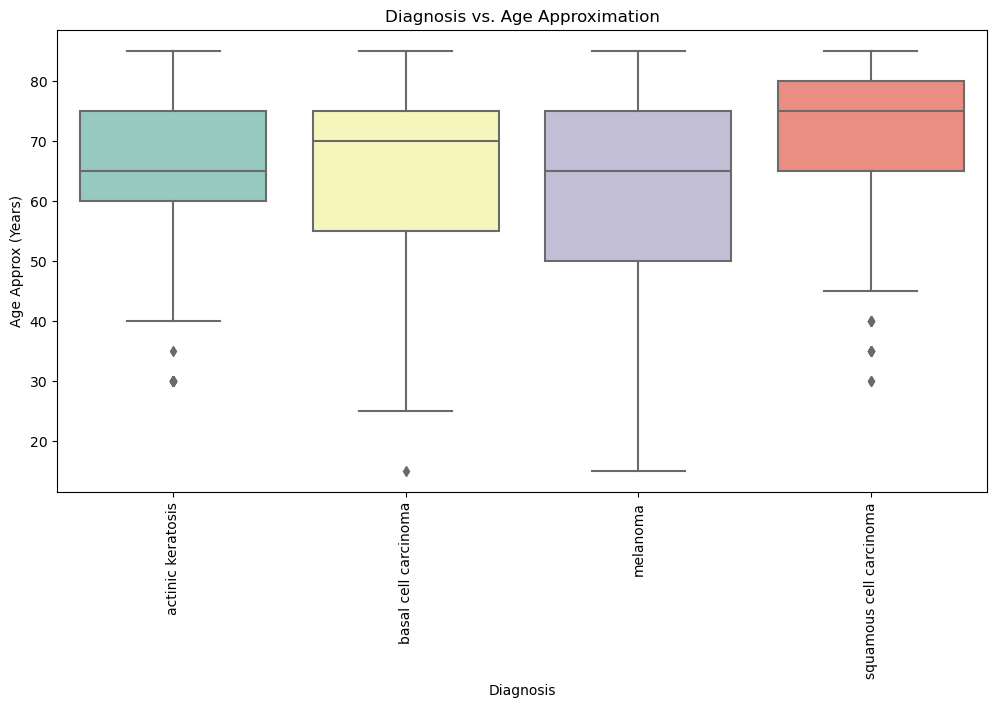

In [14]:


# 7. Advanced EDA: Relationship Between Key Variables

# Diagnosis vs. Age Approximation
plt.figure(figsize=(12, 6))
sns.boxplot(data=metadata, x='diagnosis', y='age_approx', palette='Set3')
plt.xticks(rotation=90)
plt.title('Diagnosis vs. Age Approximation')
plt.xlabel('Diagnosis')
plt.ylabel('Age Approx (Years)')
plt.show()

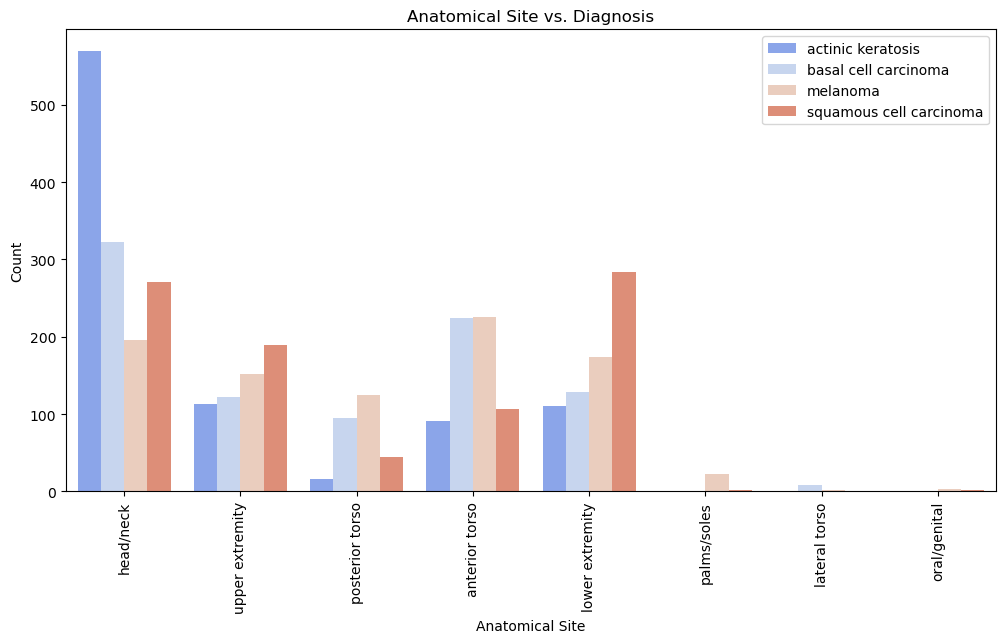

In [15]:
# Anatomical Site vs. Diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='anatom_site_general', hue='diagnosis', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Anatomical Site vs. Diagnosis')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


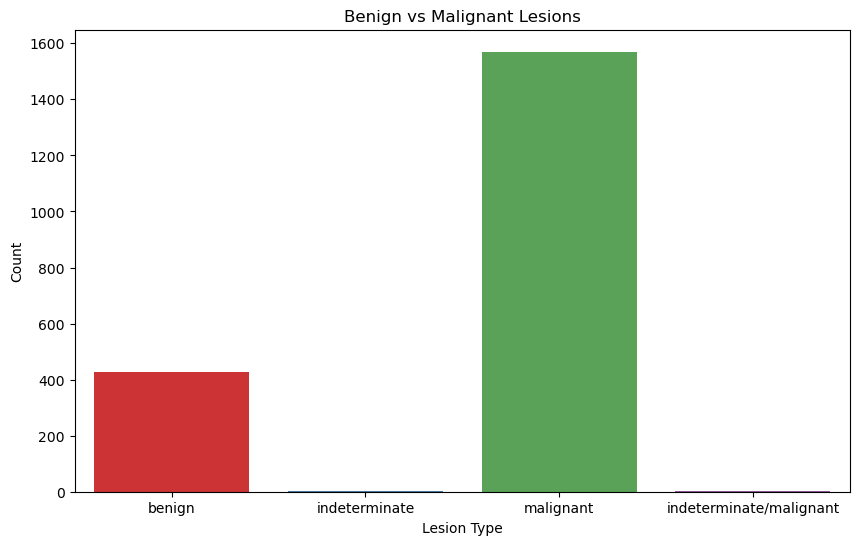

In [16]:
# 8. Benign vs Malignant Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='benign_malignant', palette='Set1')
plt.title('Benign vs Malignant Lesions')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.show()


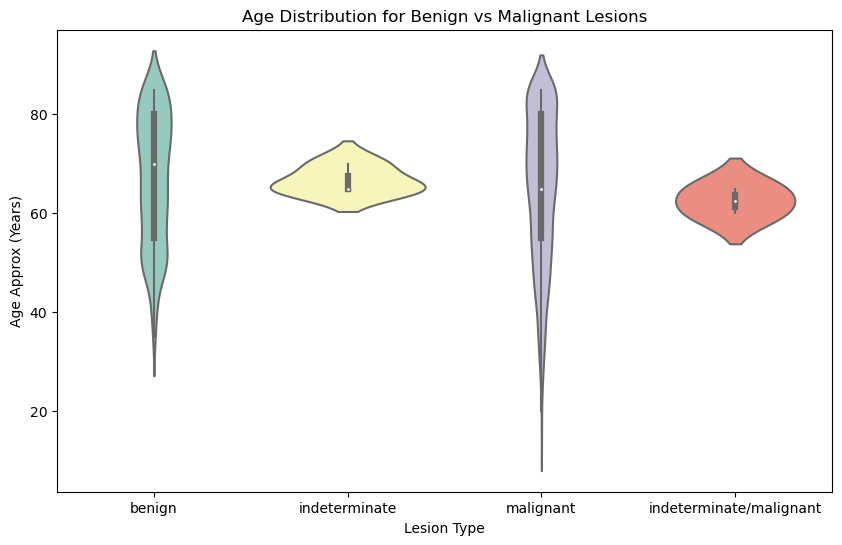

In [17]:
# 9. Age Distribution for Benign vs Malignant Lesions
plt.figure(figsize=(10, 6))
sns.violinplot(data=metadata, x='benign_malignant', y='age_approx', palette='Set3')
plt.title('Age Distribution for Benign vs Malignant Lesions')
plt.xlabel('Lesion Type')
plt.ylabel('Age Approx (Years)')
plt.show()

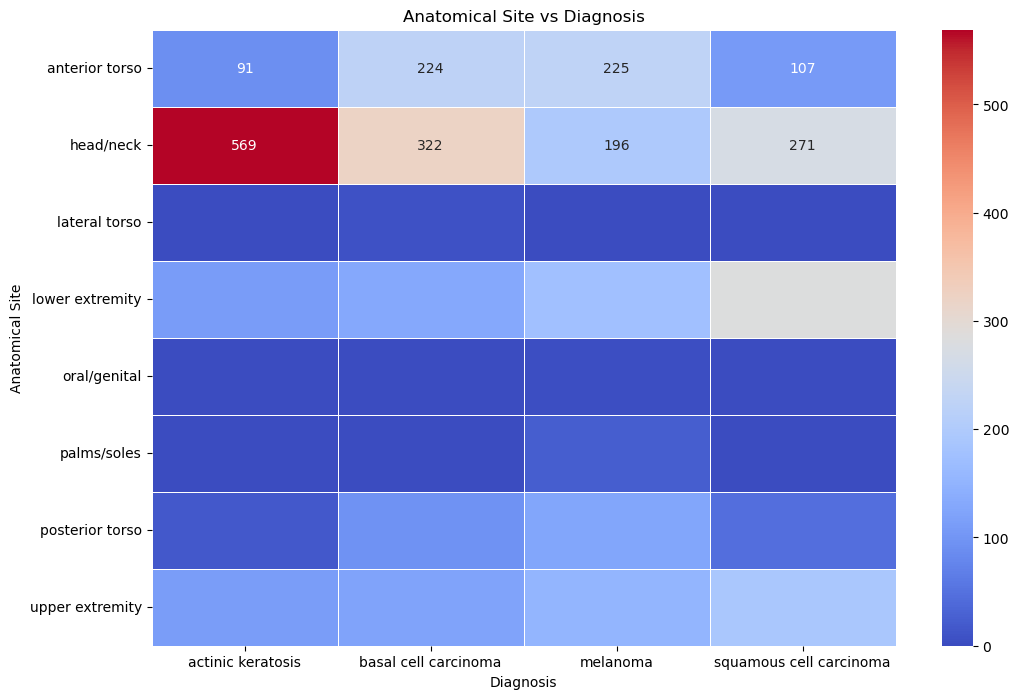

In [18]:

# 10. Anatomical Site vs Diagnosis Heatmap
plt.figure(figsize=(12, 8))
site_diag_pivot = metadata.pivot_table(index='anatom_site_general', columns='diagnosis', aggfunc='size', fill_value=0)
sns.heatmap(site_diag_pivot, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Anatomical Site vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Anatomical Site')
plt.show()


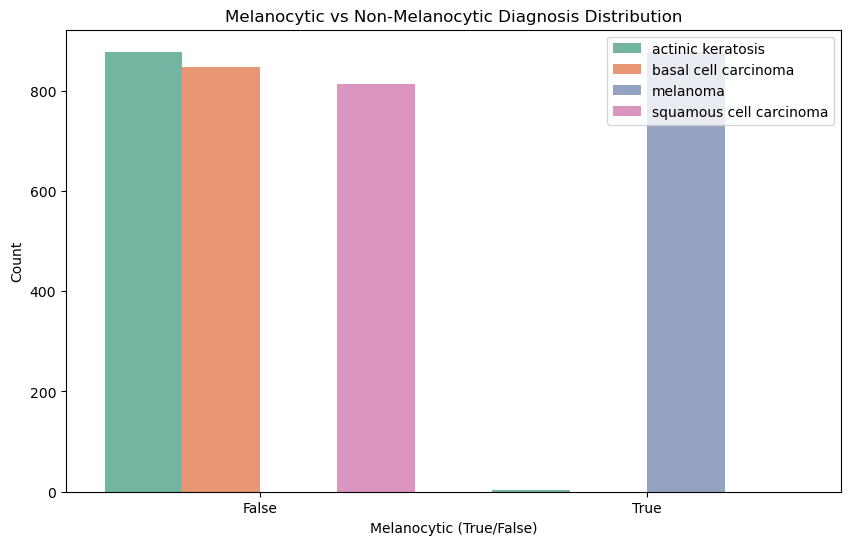

In [19]:

# 11. Melanocytic vs Non-Melanocytic Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='melanocytic', hue='diagnosis', palette='Set2')
plt.title('Melanocytic vs Non-Melanocytic Diagnosis Distribution')
plt.xlabel('Melanocytic (True/False)')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


C:\Users\Hassan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


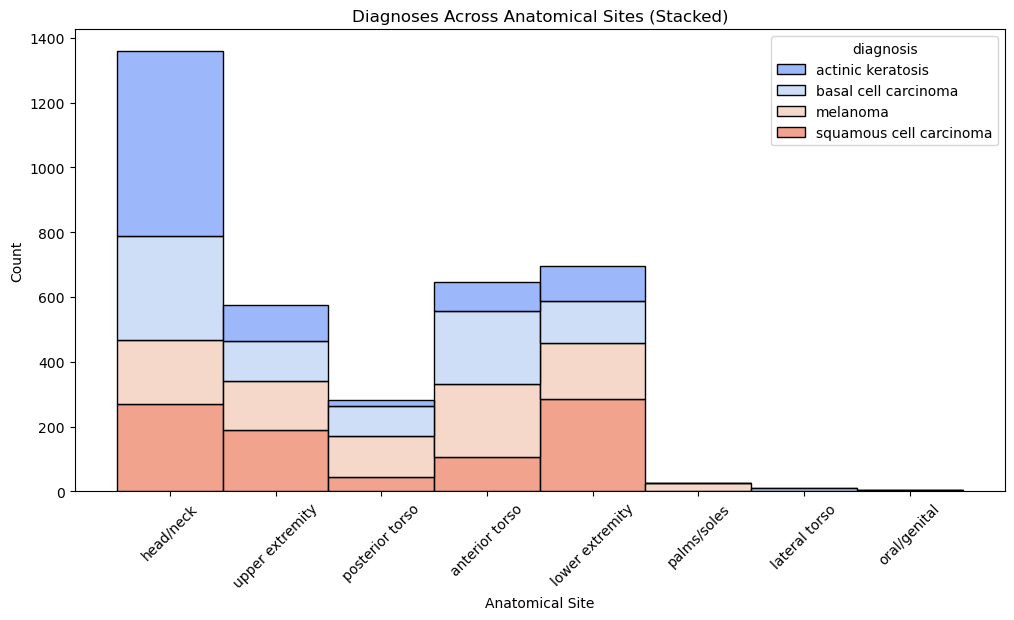

In [20]:
# 12. Diagnoses Across Different Anatomical Sites (Stacked Bar Plot)
plt.figure(figsize=(12, 6))
sns.histplot(data=metadata, x='anatom_site_general', hue='diagnosis', multiple='stack', palette='coolwarm')
plt.title('Diagnoses Across Anatomical Sites (Stacked)')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

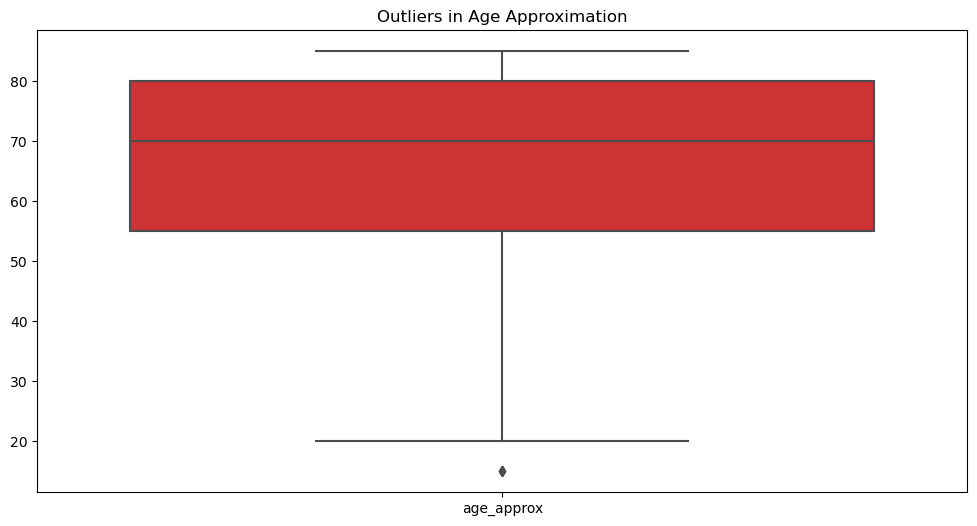

In [21]:
# 13. Outlier Detection in Numeric Columns (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=metadata[['age_approx']], palette='Set1')
plt.title('Outliers in Age Approximation')
plt.show()


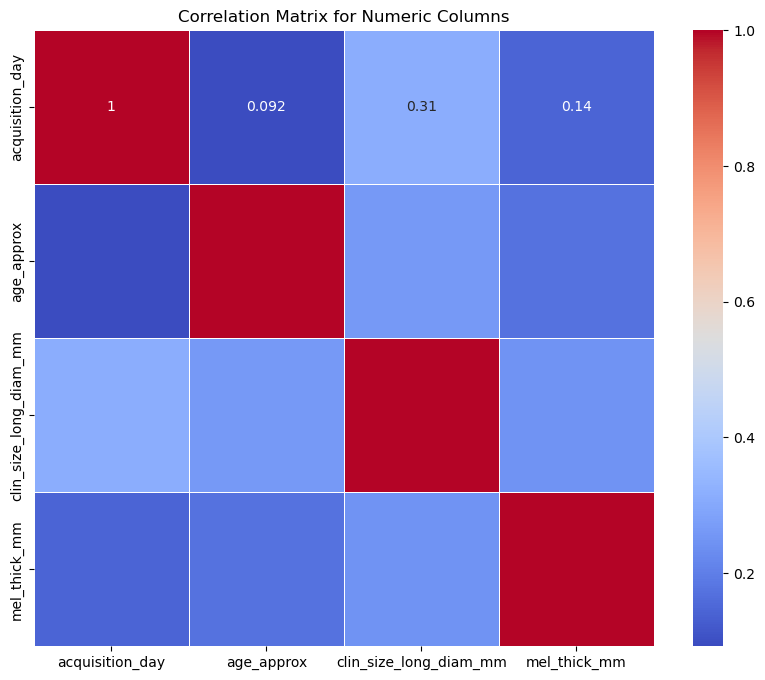

In [22]:
# 14. Correlation Matrix for Numeric Features
plt.figure(figsize=(10, 8))
correlation_matrix = metadata[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

In [23]:

# 15. Investigate and Clean 'sex' Column
print("\nUnique Values in the 'sex' Column:")
print(metadata['sex'].unique())


Unique Values in the 'sex' Column:
['female' 'male' nan]


In [24]:


# Clean the 'sex' column by stripping leading/trailing spaces and converting to lowercase
metadata['sex'] = metadata['sex'].str.strip().str.lower()

In [25]:
# After cleaning, check the unique values again
print("\nUnique Values in the 'sex' Column After Cleaning:")
print(metadata['sex'].unique())


Unique Values in the 'sex' Column After Cleaning:
['female' 'male' nan]


In [26]:

# Check the value counts in the 'sex' column
print("\nValue Counts in the 'sex' Column After Cleaning:")
print(metadata['sex'].value_counts())


Value Counts in the 'sex' Column After Cleaning:
sex
male      2119
female    1478
Name: count, dtype: int64


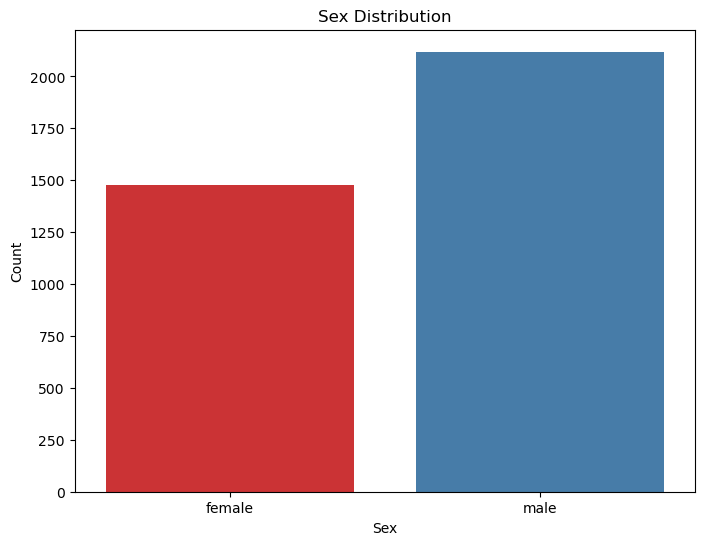

In [27]:

# Plot the distribution of 'sex' column
plt.figure(figsize=(8, 6))
sns.countplot(data=metadata, x='sex', palette='Set1')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()